In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import csv
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization


In [7]:
df = pd.read_excel("/Users/julianandelsman/Desktop/Big Data/Tp2/usu_individual_T224.xlsx")


In [8]:
print(df.shape)

(47151, 177)


In [9]:
df = df[df['IMPUTA'] != 1]

In [10]:
cols_ingreso = ['ITF', 'IPCF', 'PP06C', 'PP06D', 'PP08D1',  'P21', 'TOT_P12', 
                'V2_M', 'V3_M', 'V4_M', 'V5_M', 'V8_M',
                'V9_M', 'V10_M', 'V11_M', 'V12_M', 'V18_M', 'V21_M', 'T_VI', 
                'CH05', 'PP09A_ESP',
                'DECINDR', 'ADECINDR', 'RDECINDR', 'PDECINDR', 'GDECINDR', 'IDECINDR',
                'DECOCUR','ADECOCUR','RDECOCUR','PDECOCUR','GDECOCUR','IDECOCUR',
                'DECIFR','ADECIFR','RDECIFR','PDECIFR','GDECIFR','IDECIFR','DECCFR',
                'ADECCFR','RDECCFR','PDECCFR','GDECCFR','IDECCFR', 'ANO4', 'TRIMESTRE', 
                'COMPONENTE', 'PONDERA', 'CH03', 'CH05', 'CH15_COD', 'CH16_COD', 
                'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 
                'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J',
                'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA',
                'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 
                'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 
                'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3',
                'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1',
                'PP08J2', 'PP08J3', 'PP09A', 'PP09B', 'PP09C', 'PP09C_ESP', 'PP10A', 'PP10C', 'PP10D', 'PP10E', 'PP11A',
                'PP11B_COD', 'PP11B1', 'PP11B2_MES', 'PP11B2_ANO', 'PP11B2_DIA', 'PP11C', 'PP11C99', 'PP11D_COD',
                'PP11G_ANO', 'PP11G_MES', 'PP11G_DIA', 'PP11L', 'PP11L1', 'PP11M', 'PP11N', 'PP11O', 'PP11P', 'PP11Q', 
                'PP11R', 'PP11S', 'PP11T', 'PONDIIO', 'PONDII', 'V19_AM', 'PONDIH', 'IMPUTA', 'CH14'
                ]

df = df.drop(columns=cols_ingreso)

In [11]:
columns = df.columns.tolist()
print(columns)

['CODUSU', 'NRO_HOGAR', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'P47T']


In [ ]:

#Borrar los que tienen H15 == 0
#Region dummies
#Codigo aglomerado dummies 
#CH04, CH07, CH08 dummies, todas las CH
#NIVEL_ED, ESTADO, CAT_OCUP, CAT_INAC dummy
#IMPUTA sacamos si vale 1

In [12]:
df['MAS_500'] = np.where(df['MAS_500'] == 'S', 1, 0)

In [13]:
# Check the percentage of missing data for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
#print(missing_percentage)
positive_missing_percentage = missing_percentage[missing_percentage > 0]

# Print the columns with missing data percentages
print(positive_missing_percentage)

P47T    0.116884
dtype: float64


In [14]:
df['P47T'] = df['P47T'].fillna(-9)

total_rows = len(df)

# Count the number of rows where P47T is -9
negative_nine_count = (df['P47T'] == -9).sum()

# Calculate the percentage
percentage_negative_nine = (negative_nine_count / total_rows) * 100

percentage_negative_nine


10.995643396025926

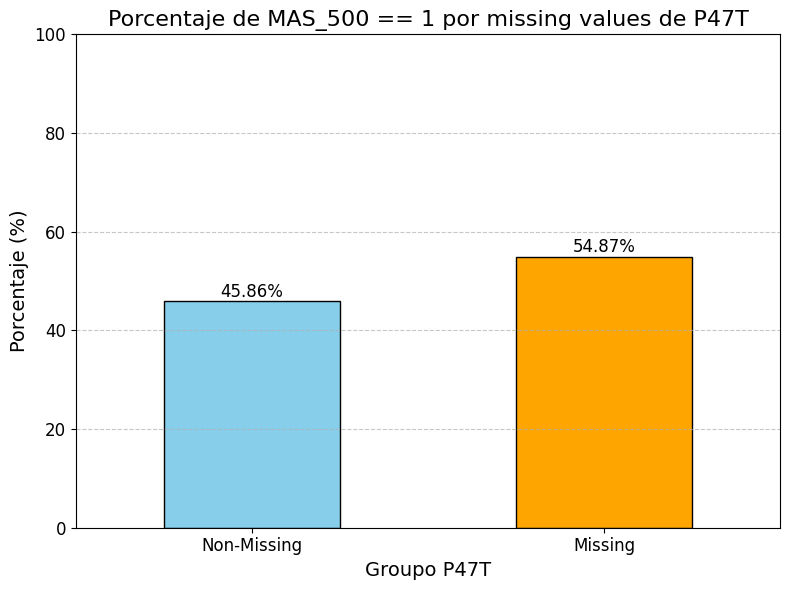

In [15]:
group_total = df['P47T'].apply(lambda x: 'Missing' if x == -9 else 'Non-Missing').value_counts()

# Count the number of people with MAS_500 == 1 in each group
mas_500_count = df[df['MAS_500'] == 1]['P47T'].apply(lambda x: 'Missing' if x == -9 else 'Non-Missing').value_counts()

# Calculate the percentage for each group
percentage = (mas_500_count / group_total) * 100

# Creating the bar chart
plt.figure(figsize=(8, 6))
percentage.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

# Customizing the chart
plt.title("Porcentaje de MAS_500 == 1 por missing values de P47T", fontsize=16)
plt.ylabel("Porcentaje (%)", fontsize=14)
plt.xlabel("Groupo P47T", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations
for i, v in enumerate(percentage):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

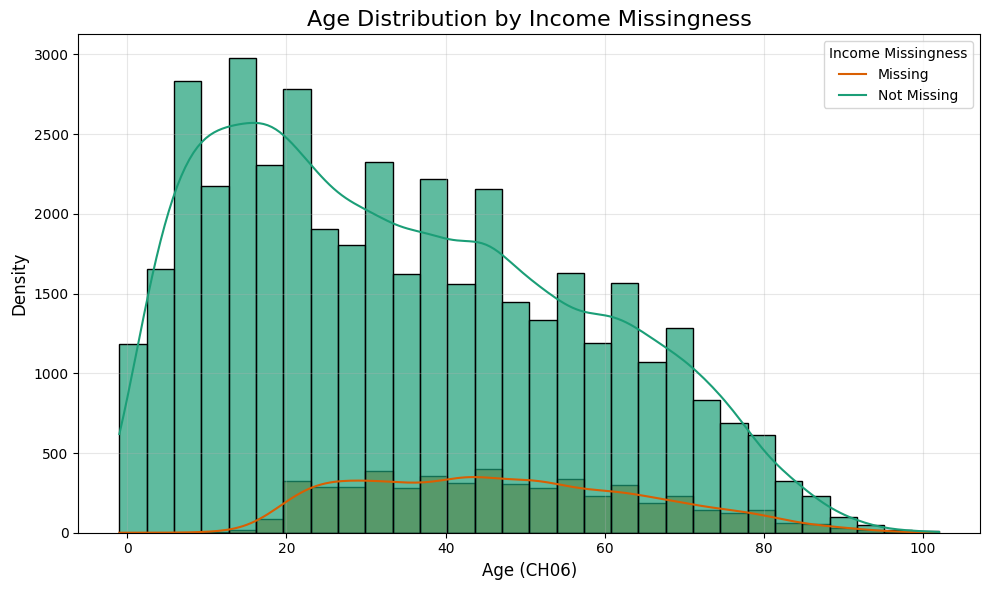

In [16]:
df['IncomeMissing'] = df['P47T'].apply(lambda x: 'Missing' if x == -9 else 'Not Missing')

# Plot the distribution of age by income missingness
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CH06', hue='IncomeMissing', kde=True, bins=30, palette="Dark2", alpha=0.7)

# Add legend with proper labels
plt.legend(labels=['Missing', 'Not Missing'], title='Income Missingness')

# Customize the plot
plt.title('Age Distribution by Income Missingness', fontsize=16)
plt.xlabel('Age (CH06)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(visible=True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

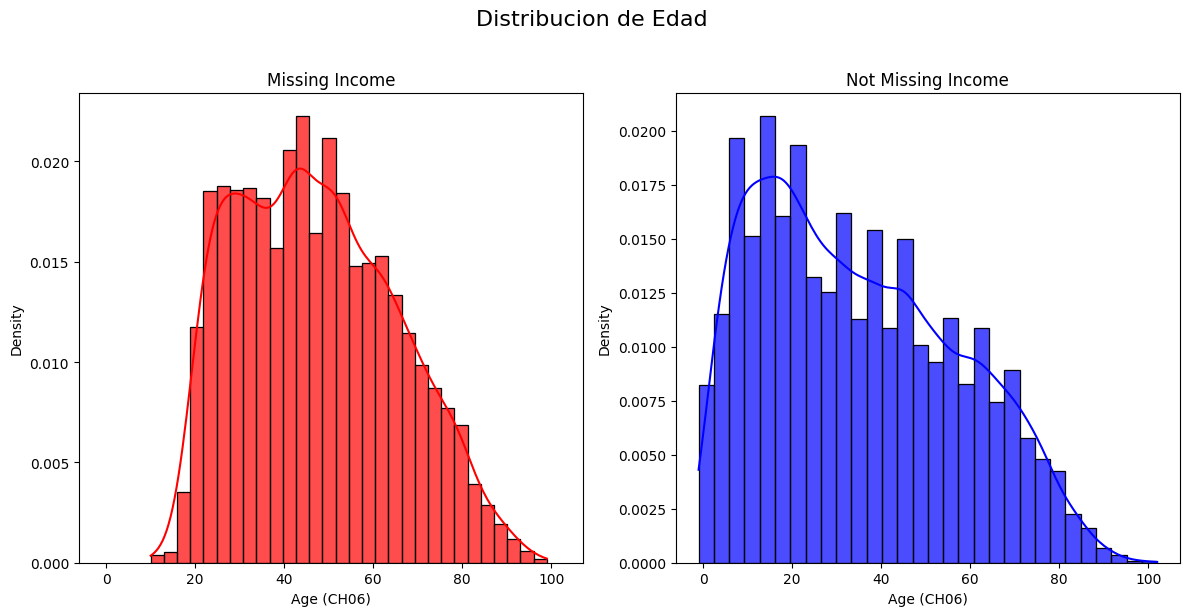

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Missing group
sns.histplot(df[df['IncomeMissing'] == 'Missing']['CH06'], kde=True, bins=30, color='red', ax=axes[0], alpha=0.7, stat="density")
axes[0].set_title("Missing Income")
axes[0].set_xlabel("Age (CH06)")
axes[0].set_ylabel("Density")
axes[0].set_ylim(0, None)  # Automatically scales the y-axis for this plot

# Not Missing group
sns.histplot(df[df['IncomeMissing'] == 'Not Missing']['CH06'], kde=True, bins=30, color='blue', ax=axes[1], alpha=0.7, stat="density")
axes[1].set_title("Not Missing Income")
axes[1].set_xlabel("Age (CH06)")
axes[1].set_ylabel("Density")
axes[1].set_ylim(0, None)  # Automatically scales the y-axis for this plot

# Add a global title
fig.suptitle("Distribucion de Edad ", fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

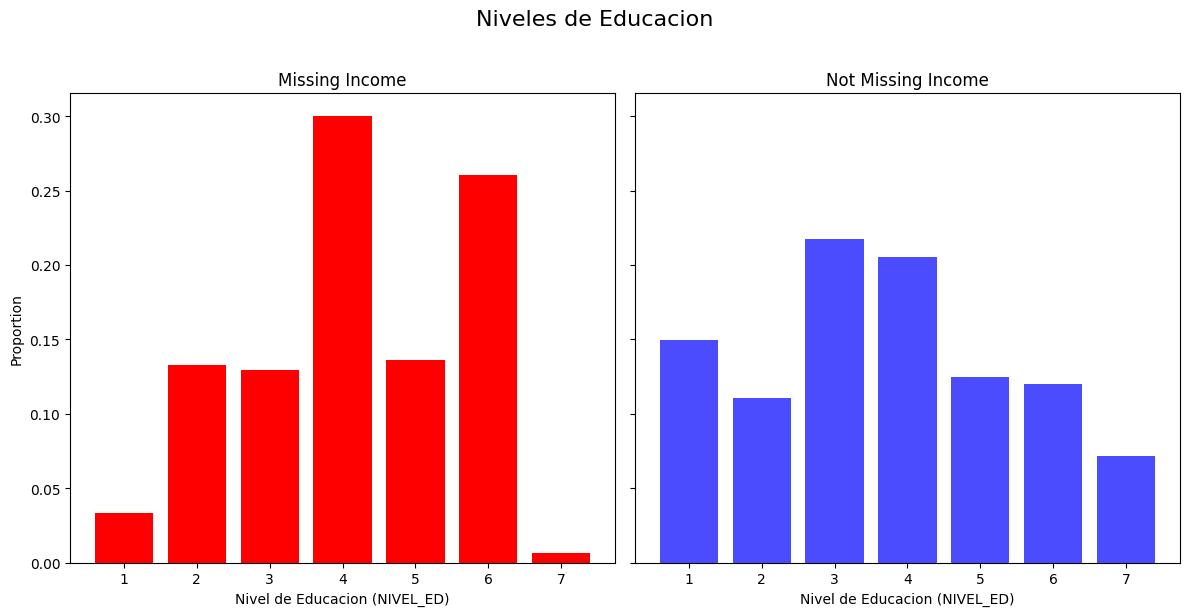

In [18]:
missing_counts = (
    df[df['IncomeMissing'] == 'Missing']['NIVEL_ED']
    .value_counts(normalize=True)
    .sort_index()
)
not_missing_counts = (
    df[df['IncomeMissing'] == 'Not Missing']['NIVEL_ED']
    .value_counts(normalize=True)
    .sort_index()
)

# Create a figure and axes for the bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Missing Income group
axes[0].bar(missing_counts.index, missing_counts.values, color='red', alpha=1)
axes[0].set_title("Missing Income")
axes[0].set_xlabel("Nivel de Educacion (NIVEL_ED)")
axes[0].set_ylabel("Proportion")
axes[0].set_xticks(range(1, 8))  # Ensure x-ticks match the natural numbers 1 to 8

# Not Missing Income group
axes[1].bar(not_missing_counts.index, not_missing_counts.values, color='blue', alpha=0.7)
axes[1].set_title("Not Missing Income")
axes[1].set_xlabel("Nivel de Educacion (NIVEL_ED)")
axes[1].set_xticks(range(1, 8))

# Add a global title
fig.suptitle("Niveles de Educacion", fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

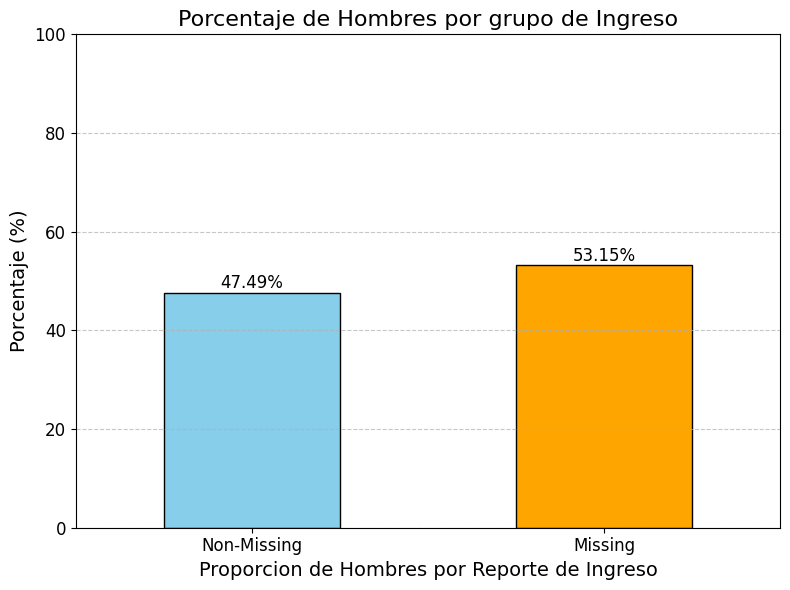

In [19]:
group_total = df['P47T'].apply(lambda x: 'Missing' if x == -9 else 'Non-Missing').value_counts()

# Count the number of people with MAS_500 == 1 in each group
mas_500_count = df[df['CH04'] == 1]['P47T'].apply(lambda x: 'Missing' if x == -9 else 'Non-Missing').value_counts()

# Calculate the percentage for each group
percentage = (mas_500_count / group_total) * 100

# Creating the bar chart
plt.figure(figsize=(8, 6))
percentage.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

# Customizing the chart
plt.title("Porcentaje de Hombres por grupo de Ingreso", fontsize=16)
plt.ylabel("Porcentaje (%)", fontsize=14)
plt.xlabel("Proporcion de Hombres por Reporte de Ingreso", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value annotations
for i, v in enumerate(percentage):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12, color='black')

plt.tight_layout()
plt.show()

In [20]:
df = df[df['P47T'] != -9]

In [21]:
df = df.copy()

# Add the num_hogar column by counting occurrences of each CODUSU
df['num_hogar'] = df['CODUSU'].map(df['CODUSU'].value_counts())

In [22]:
df = df.drop(columns=['CODUSU'])

In [23]:
df = df.drop(columns=['IncomeMissing'])

In [24]:
df = df.drop(columns=['H15'])

In [25]:
df.head(10)


,NRO_HOGAR,REGION,MAS_500,AGLOMERADO,CH04,CH06,CH07,CH08,CH09,CH10,...,CH12,CH13,CH15,CH16,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,P47T,num_hogar
0,1,1,1,32,2,66,2,1,1,2,...,6,1,1,1,6,3,0,4,500000.0,2
1,1,1,1,32,2,52,3,1,1,2,...,6,1,1,1,6,1,3,0,1365000.0,3
2,1,1,1,32,2,19,5,12,1,2,...,6,2,1,1,5,1,3,0,0.0,3
3,1,1,1,32,2,14,5,2,1,1,...,4,2,1,1,3,3,0,3,0.0,3
4,1,1,1,32,2,49,1,1,1,2,...,6,1,1,1,6,1,3,0,750700.0,1
8,1,1,1,32,1,12,5,2,1,1,...,2,2,1,1,1,3,0,3,0.0,2
9,1,1,1,32,2,11,5,2,1,1,...,2,2,1,1,1,3,0,3,0.0,2
10,1,1,1,32,2,63,3,1,1,1,...,7,2,1,1,5,3,0,1,200000.0,1
14,1,1,1,33,1,60,5,4,1,2,...,7,2,3,1,5,1,2,0,100000.0,1
20,1,1,1,32,2,56,5,1,1,2,...,7,1,1,1,6,1,3,0,610000.0,1


In [26]:
print(df['P47T'].describe())

count    4.188100e+04
mean     2.395965e+05
std      4.171506e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+05
75%      3.500000e+05
max      4.300000e+07
Name: P47T, dtype: float64


In [27]:
df['P47T'] = pd.to_numeric(df['P47T'], errors='coerce')

In [28]:
count_zero = (df['P47T'] == 0).sum()
count_positive = (df['P47T'] > 0).sum()

total_sum = len(df)

percentage_zero = (count_zero / total_sum) * 100

percentage_positive = (count_positive / total_sum) * 100

print('La proporcion de personas que respondió ingreso cero:', percentage_zero)
print('La proporcion de personas que respondió ingreso positivo:', percentage_positive)



La proporcion de personas que respondió ingreso cero: 40.01098350087152
La proporcion de personas que respondió ingreso positivo: 59.989016499128475


In [29]:
df_positive = df[df['P47T'] > 0]

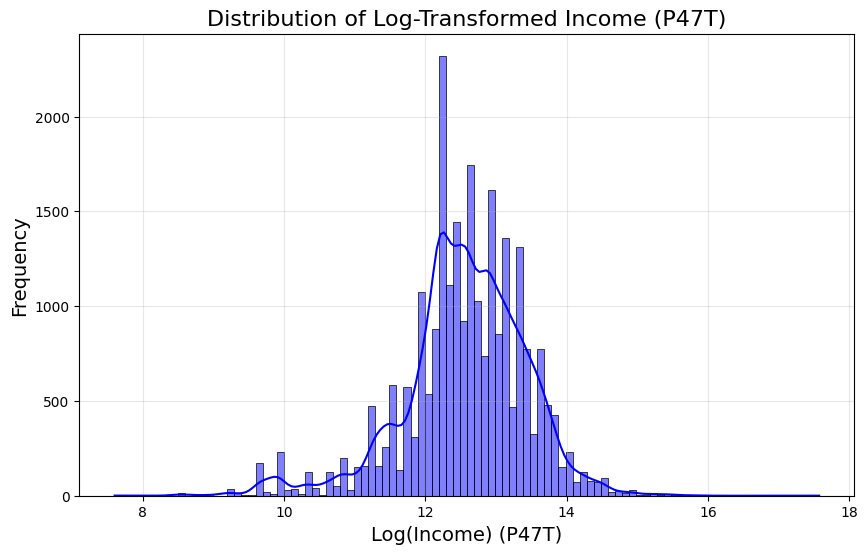

In [30]:
df_positive = df_positive.copy()

df_positive['P47T_log'] = np.log(df_positive['P47T'])

# Plot histogram of the log-transformed income values
plt.figure(figsize=(10, 6))
sns.histplot(df_positive['P47T_log'], kde=True, color='blue', bins=100)
plt.title('Distribution of Log-Transformed Income (P47T)', fontsize=16)
plt.xlabel('Log(Income) (P47T)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


In [31]:
columns_to_dummy = ['REGION', 'AGLOMERADO', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12',
                    'CH13', 'CH15', 'CH16', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC']

df[columns_to_dummy] = df[columns_to_dummy].astype('category')

# Create dummies for each column and concatenate them to the original dataframe
df_dummies = pd.get_dummies(df[columns_to_dummy], drop_first=True)

# Concatenate the dummies with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

# Drop the original columns
df = df.drop(columns=columns_to_dummy)

# Optionally, display the first few rows to verify
df.head()

,NRO_HOGAR,MAS_500,CH04,CH06,P47T,num_hogar,REGION_40,REGION_41,REGION_42,REGION_43,...,CAT_OCUP_3,CAT_OCUP_4,CAT_OCUP_9,CAT_INAC_1,CAT_INAC_2,CAT_INAC_3,CAT_INAC_4,CAT_INAC_5,CAT_INAC_6,CAT_INAC_7
0,1,1,2,66,500000.0,2,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,1,2,52,1365000.0,3,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1,1,2,19,0.0,3,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1,1,2,14,0.0,3,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,1,2,49,750700.0,1,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [32]:
# Optionally, display the first few rows to verify
df.head()

,NRO_HOGAR,MAS_500,CH04,CH06,P47T,num_hogar,REGION_40,REGION_41,REGION_42,REGION_43,...,CAT_OCUP_3,CAT_OCUP_4,CAT_OCUP_9,CAT_INAC_1,CAT_INAC_2,CAT_INAC_3,CAT_INAC_4,CAT_INAC_5,CAT_INAC_6,CAT_INAC_7
0,1,1,2,66,500000.0,2,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,1,2,52,1365000.0,3,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1,1,2,19,0.0,3,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1,1,2,14,0.0,3,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,1,2,49,750700.0,1,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [33]:

target = 'P47T'

pred_vars = pred_vars = [col for col in df.columns if col != target]

# Separate features and target variable
X = df[pred_vars]
y = df[target]

# First, split off the test set (10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Now, split the remaining data (90%) into training (70%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

In [34]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')

In [37]:
y_train = np.log1p(y_train)  
y_val = np.log1p(y_val)  
y_test= np.log1p(y_test)  

In [54]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))  # Add input shape for first layer
model.add(Dense(1, activation='relu'))  # Output layer with 3 units (one for each category)


def r_squared(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))  # Suma de los residuos al cuadrado
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))  # Suma total de la variabilidad
    r2 = 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())  # Cálculo de R²
    return tf.maximum(r2, 0.0)  # Si R² es menor que 0, se establece a 0

optimizer = Adam(learning_rate=0.0001) 
model.compile(optimizer= optimizer, loss='mse', metrics=['mae', r_squared])


In [55]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_val, y_val)
)

Epoch 1/100
917/917 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - loss: 94.6355 - mae: 7.5023 - r_squared: 0.0000e+00 - val_loss: 93.5014 - val_mae: 7.4101 - val_r_squared: 0.0000e+00
Epoch 2/100
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - loss: 95.3252 - mae: 7.5656 - r_squared: 0.0000e+00 - val_loss: 93.4960 - val_mae: 7.4098 - val_r_squared: 0.0000e+00
Epoch 3/100
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 94.6768 - mae: 7.5041 - r_squared: 0.0000e+00 - val_loss: 93.4860 - val_mae: 7.4095 - val_r_squared: 0.0000e+00
Epoch 4/100
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 24.8812 - mae: 3.7138 - r_squared: 0.4358 - val_loss: 13.4210 - val_mae: 2.4605 - val_r_squared: 0.6396
Epoch 5/100
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - loss: 12.7315 - mae: 2.3718 - r_squared: 0.6534 - val_loss: 10.5652 - val_mae: 2.1055 - val_r_squared: 0.7161
Epoch 6/100
917/917 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - loss: 10.4348 - mae: 2.0642 - r_squared: 0.7157 - val_loss: 9.4970 - val_mae: 1.9021

In [ ]:
print(df.head())

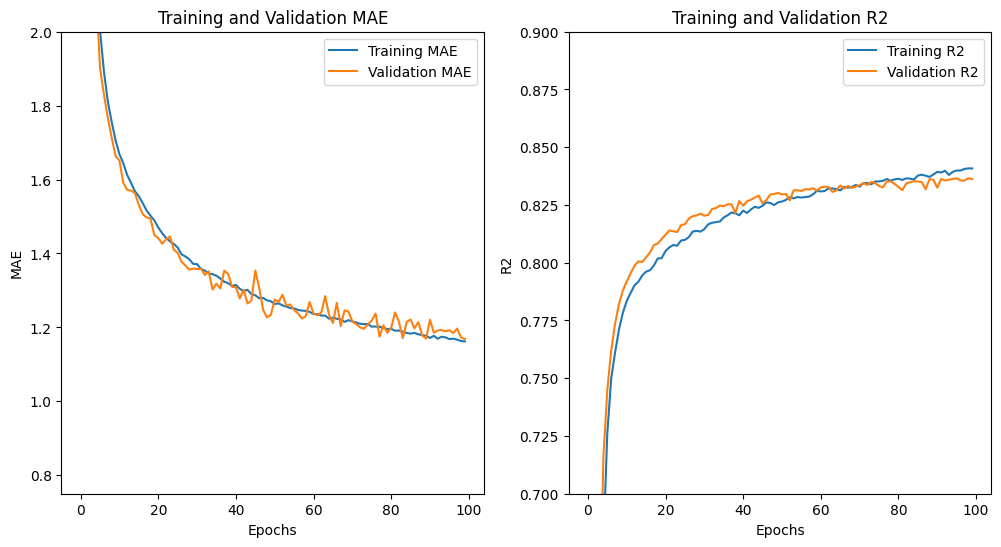

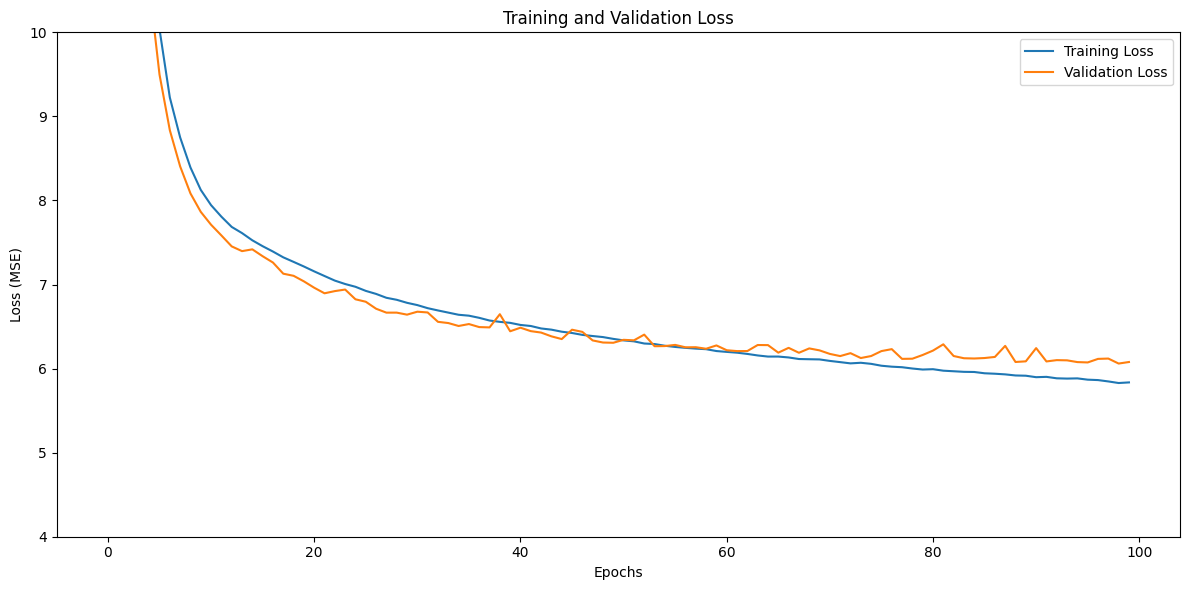

In [59]:

# Plotting accuracy and validation accuracy
plt.figure(figsize=(12, 6))

# Plot training MAE and validation MAE
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.ylim(0.75, 2)

# Plot training R2 and validation R2
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.plot(history.history['r_squared'], label='Training R2')
plt.plot(history.history['val_r_squared'], label='Validation R2')
plt.title('Training and Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.ylim(0.7, 0.9)

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.ylim(4, 10)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")

In [86]:
# Define the model 2
model = Sequential()
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))  # Add input shape for first layer
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))  # Add input shape for first layer
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1, activation='relu'))  # Output layer with 3 units (one for each category)

#initial_lr = 0.001
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate=initial_lr,
    #decay_steps=100000,
    #decay_rate=0.96,
    #staircase=True
#)


# Crear el callback para reducir la tasa de aprendizaje
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer= optimizer, loss='mse', metrics=['mae', r_squared])

In [87]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    batch_size=64, 
    validation_data=(X_val, y_val),
    #callbacks=[lr_scheduler]
)

Epoch 1/200
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 80.3764 - mae: 6.9925 - r_squared: 1.3148e-06 - val_loss: 56.2125 - val_mae: 5.7590 - val_r_squared: 0.0000e+00
Epoch 2/200
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 52.9400 - mae: 5.5525 - r_squared: 0.0057 - val_loss: 37.6617 - val_mae: 4.7437 - val_r_squared: 0.0683
Epoch 3/200
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35.9936 - mae: 4.5017 - r_squared: 0.1298 - val_loss: 24.1334 - val_mae: 3.7200 - val_r_squared: 0.3636
Epoch 4/200
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.7753 - mae: 3.5563 - r_squared: 0.3462 - val_loss: 15.0618 - val_mae: 2.6875 - val_r_squared: 0.6018
Epoch 5/200
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18.4032 - mae: 2.8491 - r_squared: 0.5066 - val_loss: 11.7172 - val_mae: 2.0539 - val_r_squared: 0.6904
Epoch 6/200
459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.8675 - mae: 2.4936 - r_squared: 0.5711 - val_loss: 10.3192 - val_mae: 1.6262 - val_r_squared: 0.7276
Ep

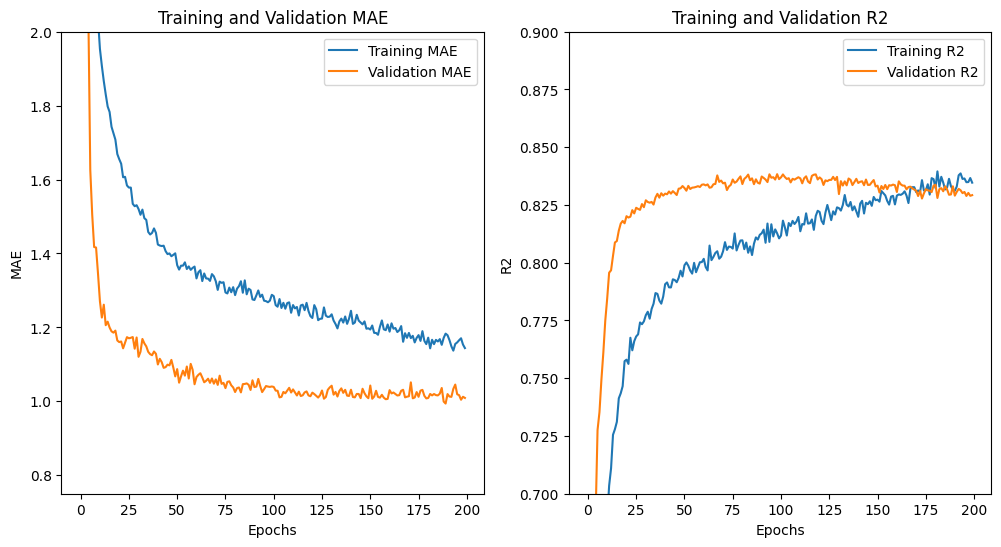

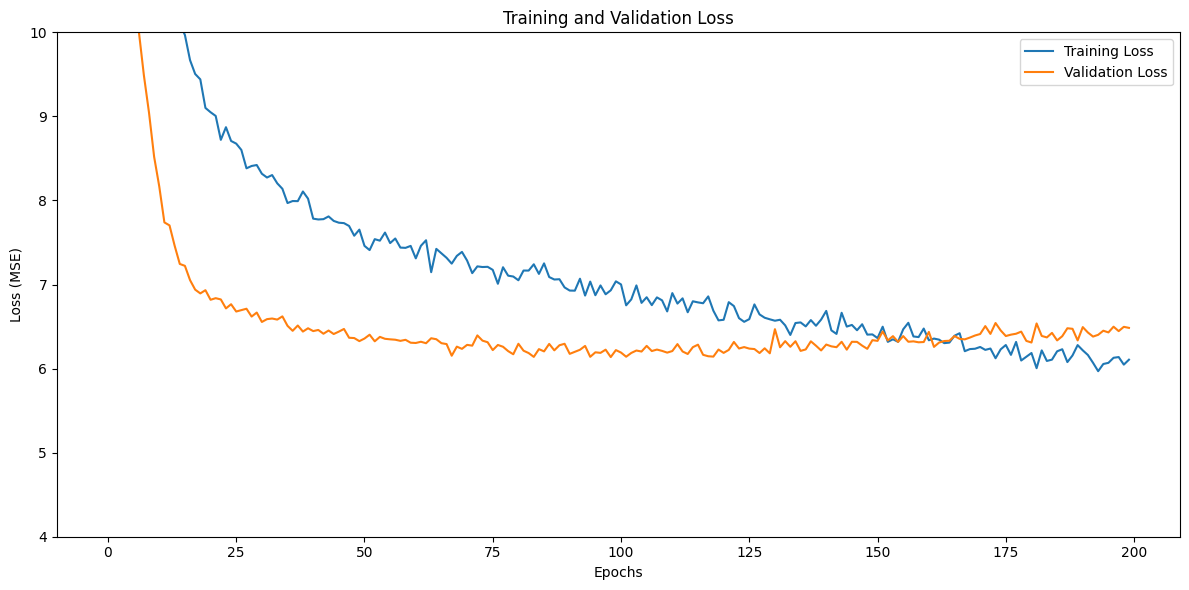

In [88]:
# Plotting accuracy and validation accuracy
plt.figure(figsize=(12, 6))

# Plot training MAE and validation MAE
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.ylim(0.75, 2)

# Plot training R2 and validation R2
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.plot(history.history['r_squared'], label='Training R2')
plt.plot(history.history['val_r_squared'], label='Validation R2')
plt.title('Training and Validation R2')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.ylim(0.7, 0.9)

# Plot training loss and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.ylim(4, 10)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
#y_transformed = np.log1p(y)  # log(1 + y)
# Inversa:
#y_original = np.expm1(y_pred)  # inversa de log(1 + y)
